
Computed and Theoretical k² Comparison:
Mode	Computed k² (rad/mm²)	Theoretical k² (rad/mm²)
TE(1,1)	1.3598e-01		1.3598e-01
TE(2,1)	2.1755e-01		2.1757e-01
TE(3,1)	3.5347e-01		3.5355e-01
TE(1,2)	4.6227e-01		4.6234e-01
TE(4,1)	5.4367e-01		5.4393e-01
TE(2,2)	5.4385e-01		5.4393e-01
TE(3,2)	6.7977e-01		6.7991e-01
TE(5,1)	7.8808e-01		7.8869e-01


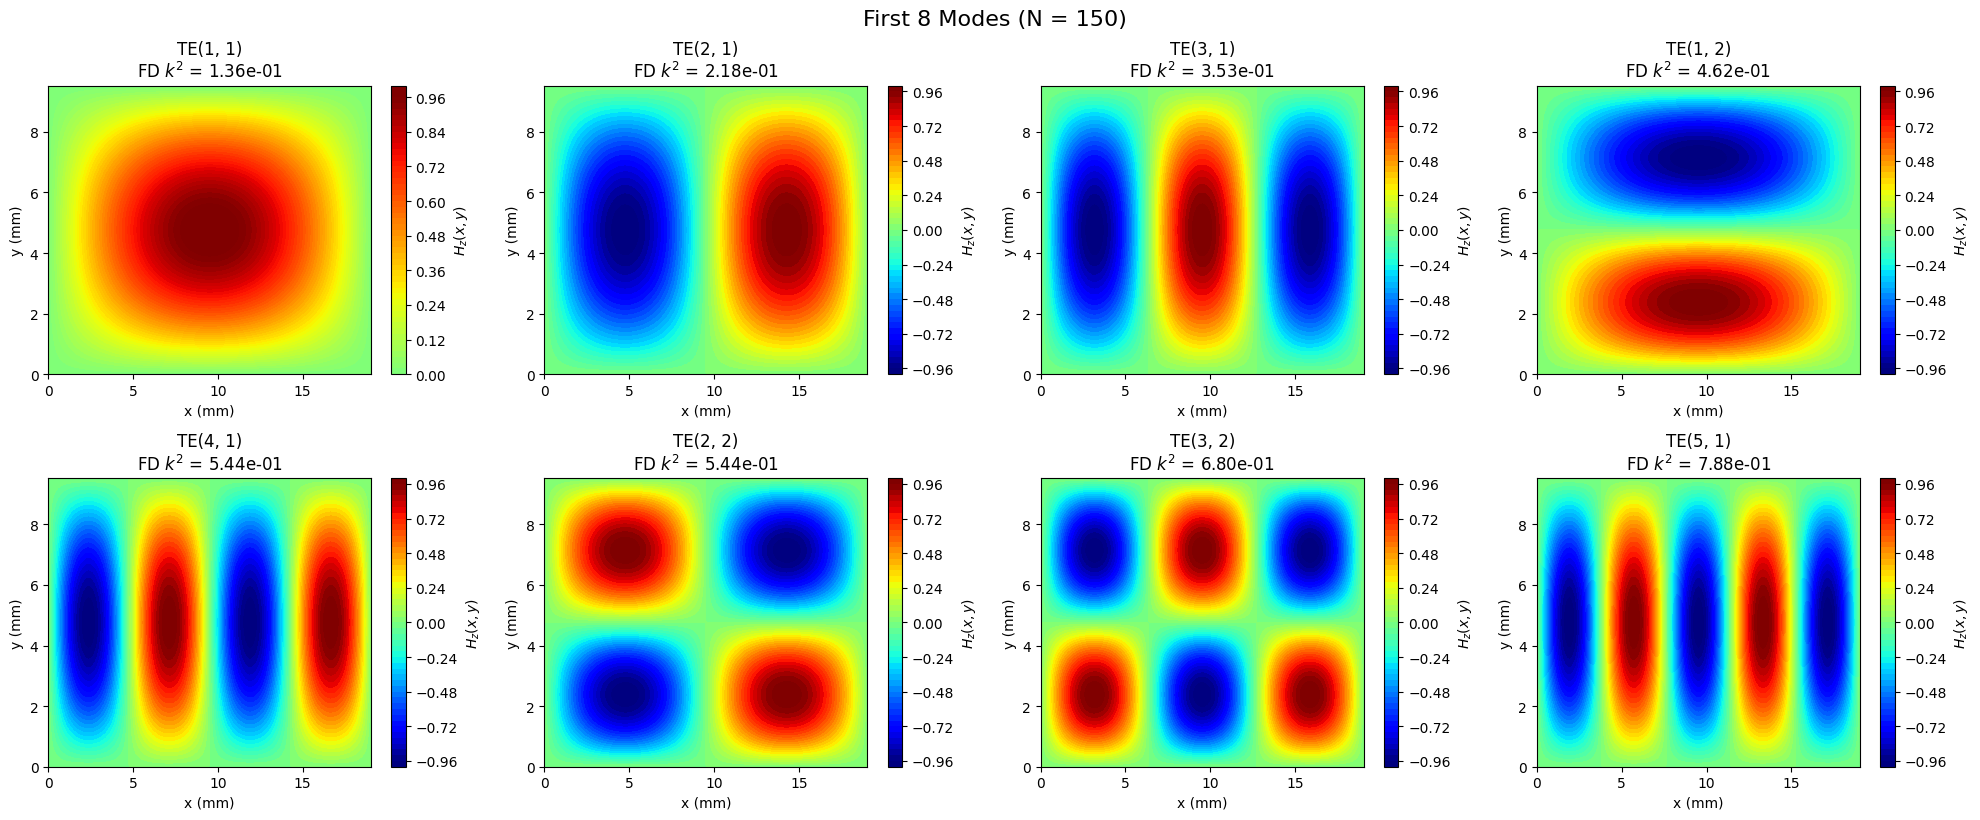

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh

# Waveguide dimensions (WR90 in mm)
a = 19.05
b = 9.525

# Mode list (TEmn) in order to compare and label
modes = [(1, 1), (2, 1), (3, 1), (1, 2), (4, 1), (2, 2), (3, 2), (5, 1)]

def solve_fd_modes(N=200, num_modes=20, plot_modes=8):
    hx = a / (N + 1)
    hy = b / (N + 1)
    num_points = N * N

    # Construct finite-difference Laplacian matrix
    diagonal = np.full(num_points, 2 * (1 / hx**2 + 1 / hy**2))
    off_diagonal_x = np.full(num_points - 1, -1 / hx**2)
    off_diagonal_y = np.full(num_points - N, -1 / hy**2)

    # Prevent wrap-around in x-direction
    for i in range(1, N):
        off_diagonal_x[i * N - 1] = 0

    A = diags(
        [diagonal, off_diagonal_x, off_diagonal_x, off_diagonal_y, off_diagonal_y],
        [0, -1, 1, -N, N]
    ).tocsc()

    # Solve eigenvalue problem
    eigvals, eigvecs = eigsh(A, k=num_modes, which='SM')
    sorted_indices = np.argsort(eigvals)
    eigvals = eigvals[sorted_indices]
    eigvecs = eigvecs[:, sorted_indices]

    # Theoretical k² values for comparison
    k2_theoretical = [((np.pi * m / a)**2 + (np.pi * n / b)**2) for m, n in modes]

    print("\nComputed and Theoretical k² Comparison:")
    print("Mode\tComputed k² (rad/mm²)\tTheoretical k² (rad/mm²)")
    for idx, (mode, theo_k2) in enumerate(zip(modes, k2_theoretical)):
        print(f"TE({mode[0]},{mode[1]})\t{eigvals[idx]:.4e}\t\t{theo_k2:.4e}")

    # Plot eigenmodes
    plt.figure(figsize=(20, 8))
    for mode in range(plot_modes):
        field = eigvecs[:, mode].reshape((N, N))
        field /= np.max(np.abs(field))  # normalize
        field_padded = np.pad(field, pad_width=1, mode='constant')

        x_plot = np.linspace(0, a, N + 2)
        y_plot = np.linspace(0, b, N + 2)

        plt.subplot(2, 4, mode + 1)
        cp = plt.contourf(x_plot, y_plot, field_padded, levels=50, cmap='jet', vmin=-0.96, vmax=0.96)
        plt.colorbar(cp, label=r"$H_z(x,y)$")
        plt.title(f"TE{modes[mode]}\nFD $k^2$ = {eigvals[mode]:.2e}")
        plt.xlabel("x (mm)")
        plt.ylabel("y (mm)")

    plt.tight_layout()
    plt.suptitle(f"First {plot_modes} Modes (N = {N})", fontsize=16, y=1.02)
    plt.show()

# 🟢 Call the function with any grid resolution:
solve_fd_modes(N=150, num_modes=20, plot_modes=8)


Computed and Theoretical k² Comparison:
Mode	Computed k² (rad/mm²)	Theoretical k² (rad/mm²)
TE(1,1)	1.3598e-01		1.3598e-01
TE(2,1)	2.1756e-01		2.1757e-01
TE(3,1)	3.5350e-01		3.5355e-01
TE(1,2)	4.6230e-01		4.6234e-01
TE(4,1)	5.4378e-01		5.4393e-01
TE(2,2)	5.4388e-01		5.4393e-01
TE(3,2)	6.7983e-01		6.7991e-01
TE(5,1)	7.8834e-01		7.8869e-01


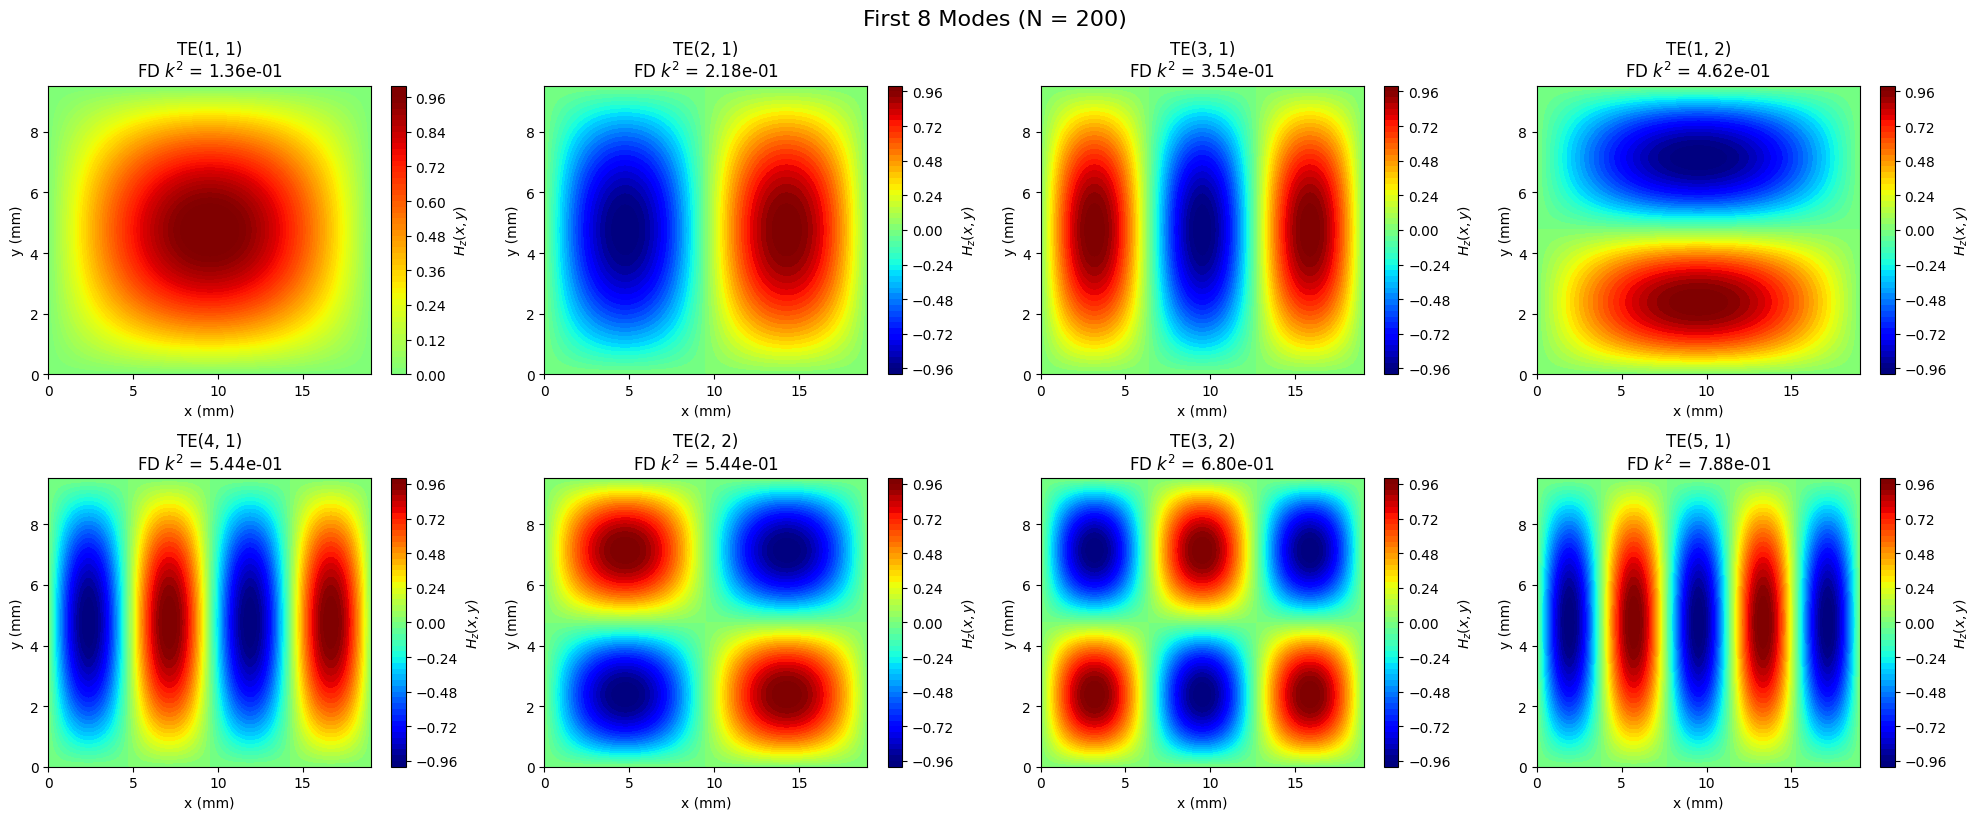

In [ ]:
solve_fd_modes(N=200, num_modes=20, plot_modes=8)


Computed and Theoretical k² Comparison:
Mode	Computed k² (rad/mm²)	Theoretical k² (rad/mm²)
TE(1,1)	1.3598e-01		1.3598e-01
TE(2,1)	2.1757e-01		2.1757e-01
TE(3,1)	3.5353e-01		3.5355e-01
TE(1,2)	4.6232e-01		4.6234e-01
TE(4,1)	5.4386e-01		5.4393e-01
TE(2,2)	5.4391e-01		5.4393e-01
TE(3,2)	6.7987e-01		6.7991e-01
TE(5,1)	7.8854e-01		7.8869e-01


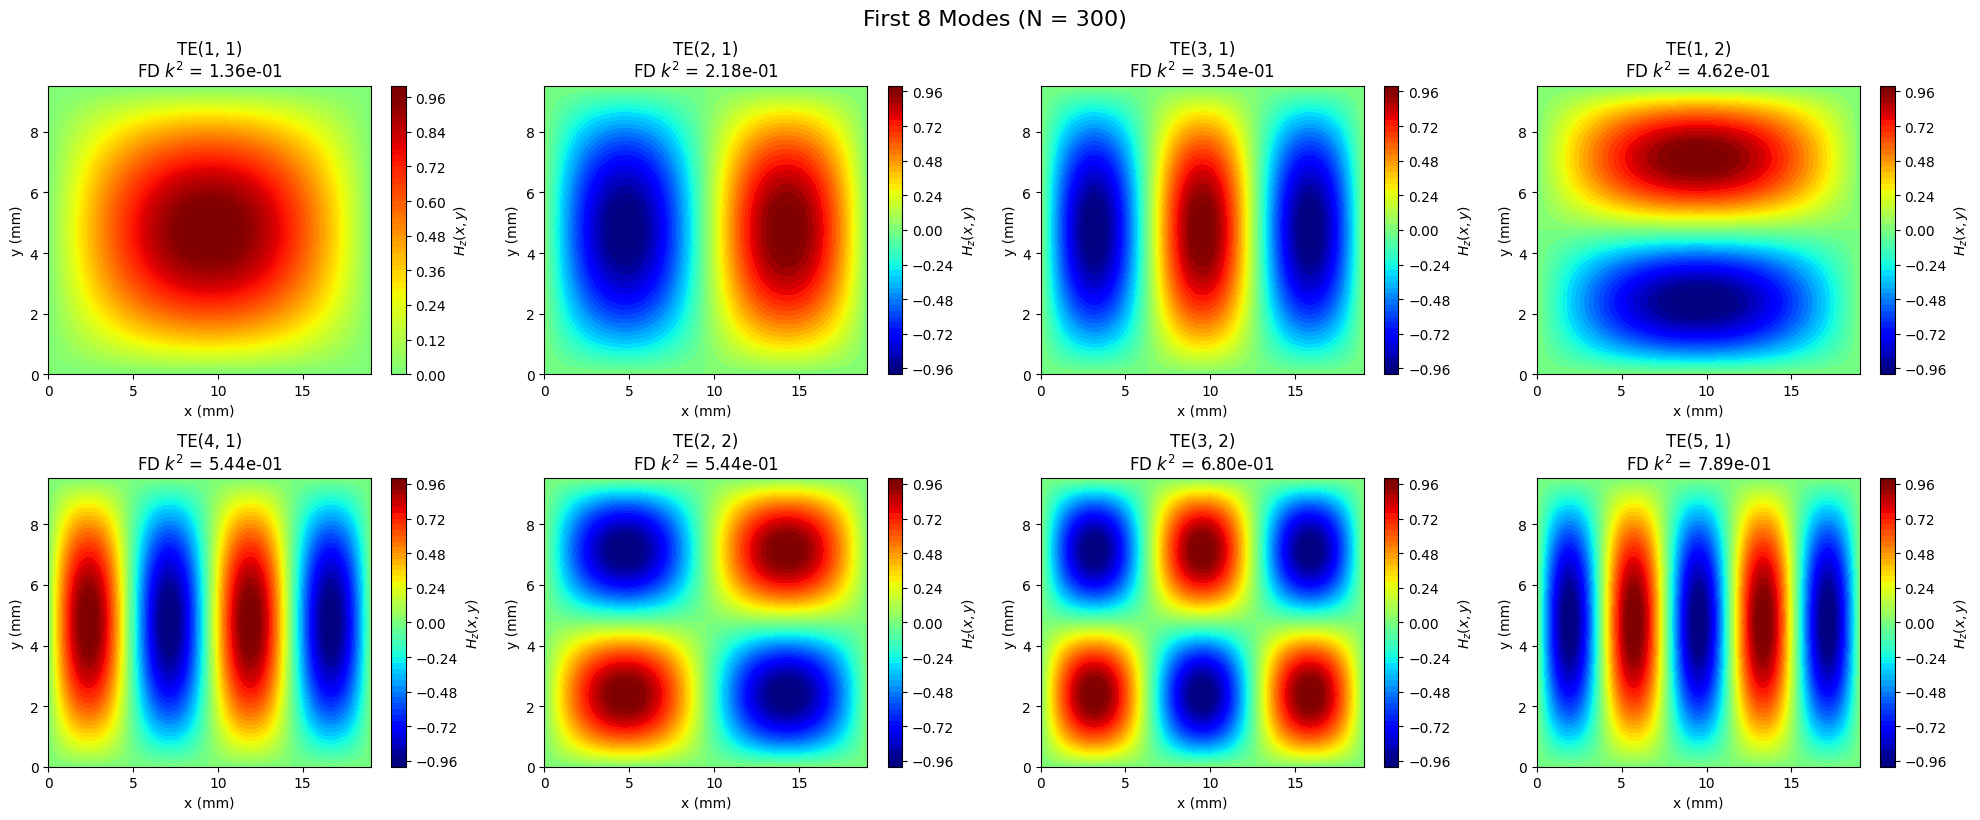

In [ ]:
solve_fd_modes(N=300, num_modes=20, plot_modes=8)

=== Finite Difference Convergence Analysis ===
Waveguide dimensions: a = 19.05 mm, b = 9.525 mm

N = 500, hy = 3.8024e-02, Mode TE(1,1): computed k^2 = 1.3598e-01, theoretical k^2 = 1.3598e-01, rel error = 3.2767e-06
N = 500, hy = 3.8024e-02, Mode TE(2,1): computed k^2 = 2.1757e-01, theoretical k^2 = 2.1757e-01, rel error = 8.1918e-06
N = 500, hy = 3.8024e-02, Mode TE(3,1): computed k^2 = 3.5354e-01, theoretical k^2 = 3.5355e-01, rel error = 2.1425e-05
N = 500, hy = 3.8024e-02, Mode TE(1,2): computed k^2 = 4.6233e-01, theoretical k^2 = 4.6234e-01, rel error = 1.2529e-05
N = 500, hy = 3.8024e-02, Mode TE(4,1): computed k^2 = 5.4390e-01, theoretical k^2 = 5.4393e-01, rel error = 4.2597e-05
N = 500, hy = 3.8024e-02, Mode TE(2,2): computed k^2 = 5.4392e-01, theoretical k^2 = 5.4393e-01, rel error = 1.3107e-05
N = 500, hy = 3.8024e-02, Mode TE(3,2): computed k^2 = 6.7989e-01, theoretical k^2 = 6.7991e-01, rel error = 1.9005e-05
N = 500, hy = 3.8024e-02, Mode TE(5,1): computed k^2 = 7.8864e-

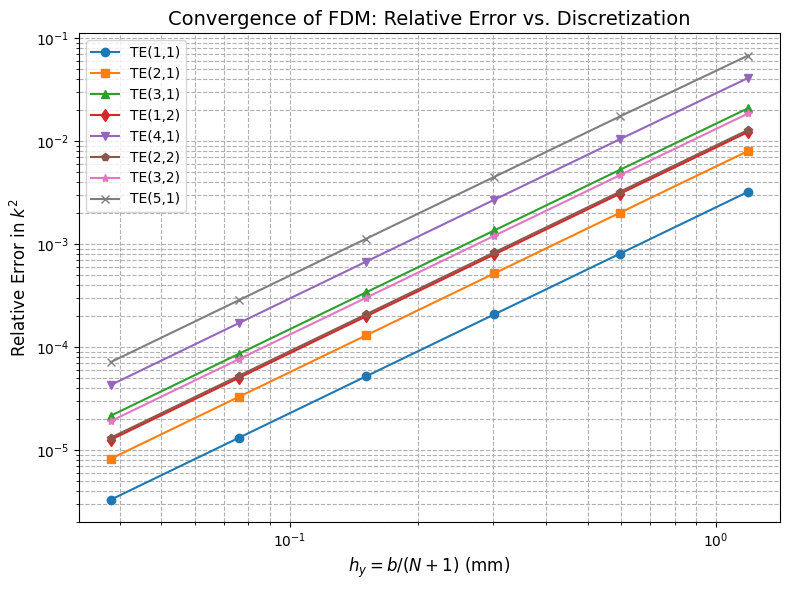

In [ ]:
modes = [(1, 1), (2, 1), (3, 1), (1, 2), (4, 1), (2, 2), (3, 2), (5, 1)]
k2_theoretical = [((np.pi * m / a)**2 + (np.pi * n / b)**2) for (m, n) in modes]

N_values = [500, 250, 125, 62, 31, 15]

hxs = []  # grid spacing hx for each N (same for all modes)
rel_errors = {f"TE({m},{n})": [] for (m, n) in modes}

print("=== Finite Difference Convergence Analysis ===")
print(f"Waveguide dimensions: a = {a} mm, b = {b} mm\n")

for N in N_values:
    hx = a / (N + 1)
    hy = b / (N + 1)
    hxs.append(hx)

    num_points = N * N  # total interior points

    diagonal = np.full(num_points, 2 * (1/hx**2 + 1/hy**2))
    off_diagonal_x = np.full(num_points - 1, -1/hx**2)
    off_diagonal_y = np.full(num_points - N, -1/hy**2)

    for i in range(1, N):
        off_diagonal_x[i * N - 1] = 0

    A = diags(
        [diagonal, off_diagonal_x, off_diagonal_x, off_diagonal_y, off_diagonal_y],
        [0, -1, 1, -N, N]
    ).tocsc()

    num_eigs = 20
    eigvals, eigvecs = eigsh(A, k=num_eigs, which='SM')

    # Sort the eigenvalues
    sorted_indices = np.argsort(eigvals)
    eigvals = eigvals[sorted_indices]

    for idx, (m, n) in enumerate(modes):
        theo = ((np.pi * m / a)**2 + (np.pi * n / b)**2)
        computed = eigvals[idx]
        rel_err = np.abs(computed - theo) / theo
        rel_errors[f"TE({m},{n})"].append(rel_err)

        print(f"N = {N:3d}, hy = {hx:.4e}, Mode TE({m},{n}): computed k^2 = {computed:.4e}, theoretical k^2 = {theo:.4e}, rel error = {rel_err:.4e}")

    print()

# Plot the convergence analysis: relative error vs. grid spacing
plt.figure(figsize=(8, 6))
markers = ['o', 's', '^', 'd', 'v', 'p', '*', 'x']

for i, mode in enumerate(modes):
    key = f"TE({mode[0]},{mode[1]})"
    plt.loglog(hxs, rel_errors[key], marker=markers[i], linestyle='-', label=key)

plt.xlabel(r"$h_y = b/(N+1)$ (mm)", fontsize=12)
plt.ylabel("Relative Error in $k^2$", fontsize=12)
plt.title("Convergence of FDM: Relative Error vs. Discretization", fontsize=14)
plt.grid(True, which="both", ls="--")
plt.legend()
plt.tight_layout()
plt.show()